In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_set = pd.read_csv(r'user_behavior_dataset.csv')
data_set  #displaying the dataset

,User_ID,Device_Model,Operating_System,App_Usage_Time,Screen_On_Time,Battery_Drain,Number_of_Apps_Installed,Data_Usage,Age,Gender,User_Behavior_Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3
...,...,...,...,...,...,...,...,...,...,...,...
695,696,iPhone 12,iOS,92,3.9,1082,26,381,22,Male,2
696,697,Xiaomi Mi 11,Android,316,6.8,1965,68,1201,59,Male,4
697,698,Google Pixel 5,Android,99,3.1,942,22,457,50,Female,2
698,699,Samsung Galaxy S21,Android,62,1.7,431,13,224,44,Male,1


In [3]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   User_ID                   700 non-null    int64  
 1   Device_Model              700 non-null    object 
 2   Operating_System          700 non-null    object 
 3   App_Usage_Time            700 non-null    int64  
 4   Screen_On_Time            700 non-null    float64
 5   Battery_Drain             700 non-null    int64  
 6   Number_of_Apps_Installed  700 non-null    int64  
 7   Data_Usage                700 non-null    int64  
 8   Age                       700 non-null    int64  
 9   Gender                    700 non-null    object 
 10  User_Behavior_Class       700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


In [4]:
data_set.describe()

,User_ID,App_Usage_Time,Screen_On_Time,Battery_Drain,Number_of_Apps_Installed,Data_Usage,Age,User_Behavior_Class
count,700.00000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,350.50000,271.128571,5.272714,1525.158571,50.681429,929.742857,38.482857,2.990000
std,202.21688,177.199484,3.068584,819.136414,26.943324,640.451729,12.012916,1.401476
min,1.00000,30.000000,1.000000,302.000000,10.000000,102.000000,18.000000,1.000000
25%,175.75000,113.250000,2.500000,722.250000,26.000000,373.000000,28.000000,2.000000
50%,350.50000,227.500000,4.900000,1502.500000,49.000000,823.500000,38.000000,3.000000
75%,525.25000,434.250000,7.400000,2229.500000,74.000000,1341.000000,49.000000,4.000000
max,700.00000,598.000000,12.000000,2993.000000,99.000000,2497.000000,59.000000,5.000000


In [5]:
data_set.isnull().sum() #no null values

User_ID                     0
Device_Model                0
Operating_System            0
App_Usage_Time              0
Screen_On_Time              0
Battery_Drain               0
Number_of_Apps_Installed    0
Data_Usage                  0
Age                         0
Gender                      0
User_Behavior_Class         0
dtype: int64

In [6]:
data_set.duplicated().sum() #no duplicates

np.int64(0)

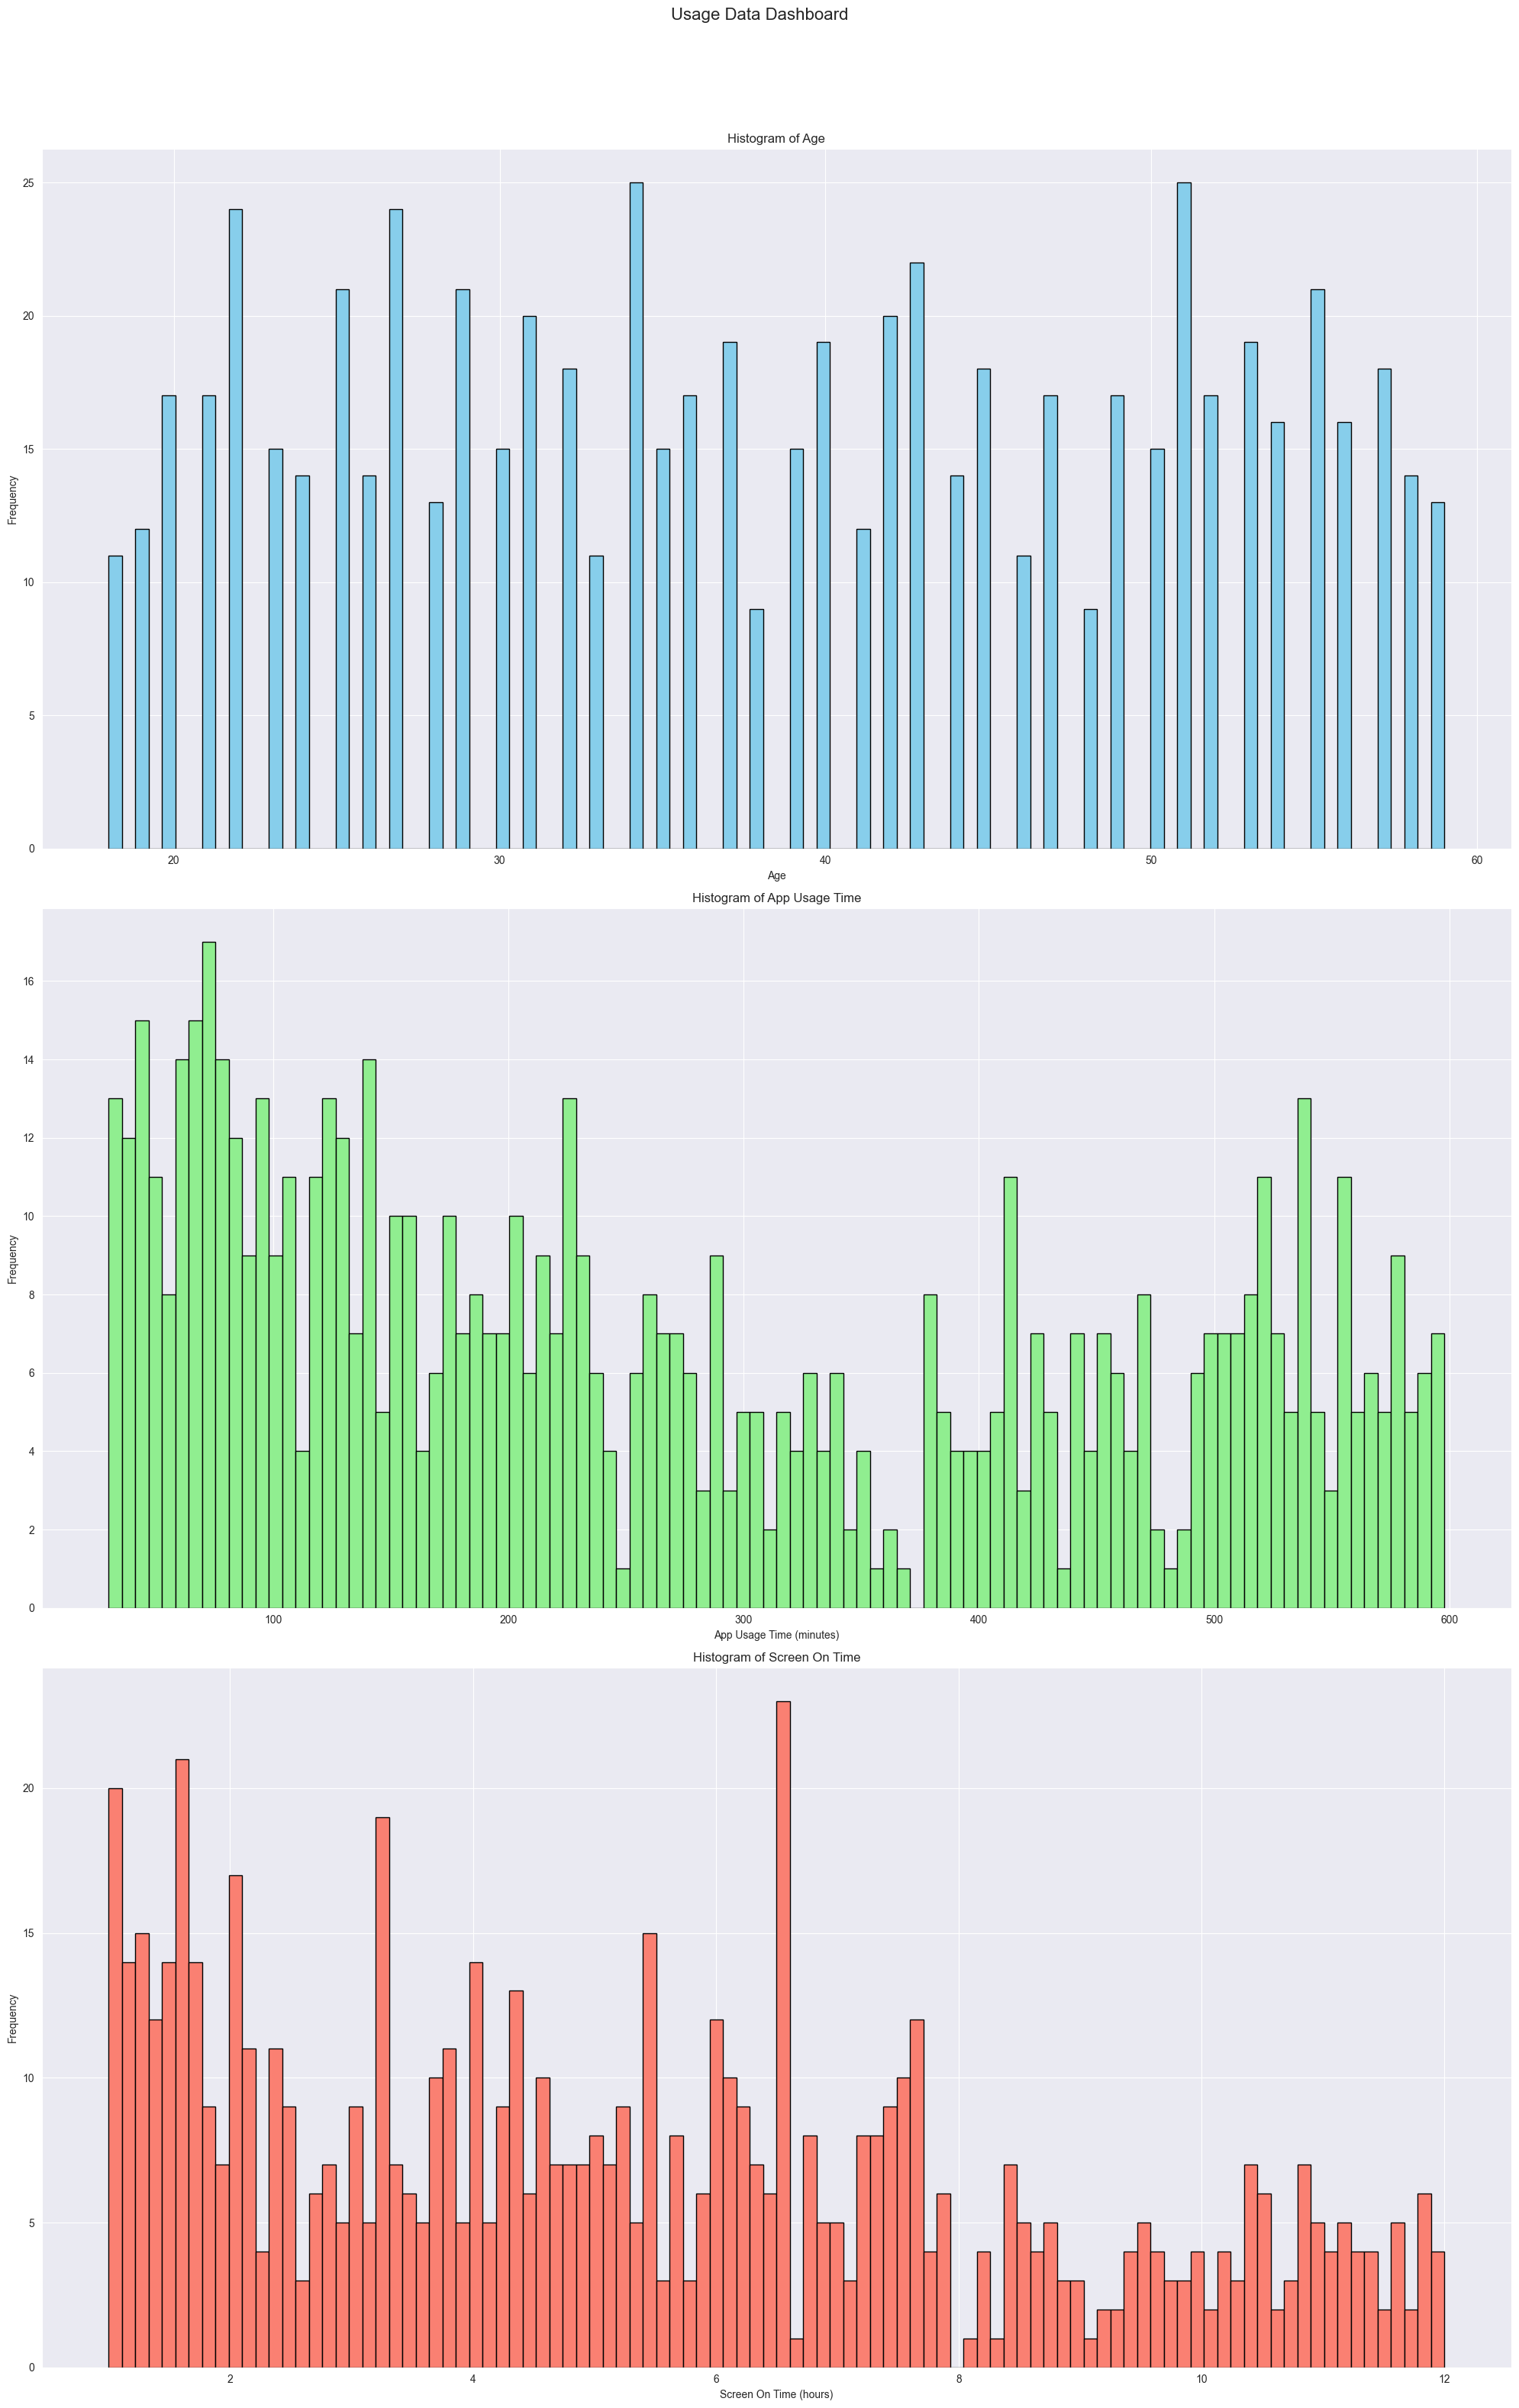

In [7]:
# Create subplots
fig, axes = plt.subplots(3, 1, figsize=(20, 30))  # 1 row, 3 columns

# Histogram for Age
axes[0].hist(data_set['Age'], bins=100, color='skyblue', edgecolor='black')
axes[0].set_title('Histogram of Age')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')

# Histogram for App_Usage_Time
axes[1].hist(data_set['App_Usage_Time'], bins=100, color='lightgreen', edgecolor='black')
axes[1].set_title('Histogram of App Usage Time')
axes[1].set_xlabel('App Usage Time (minutes)')
axes[1].set_ylabel('Frequency')

# Histogram for Screen_On_Time
axes[2].hist(data_set['Screen_On_Time'], bins=100, color='salmon', edgecolor='black')
axes[2].set_title('Histogram of Screen On Time')
axes[2].set_xlabel('Screen On Time (hours)')
axes[2].set_ylabel('Frequency')

# Tidy up layout
plt.tight_layout()
plt.suptitle('Usage Data Dashboard', fontsize=16, y=1.05)
plt.show()


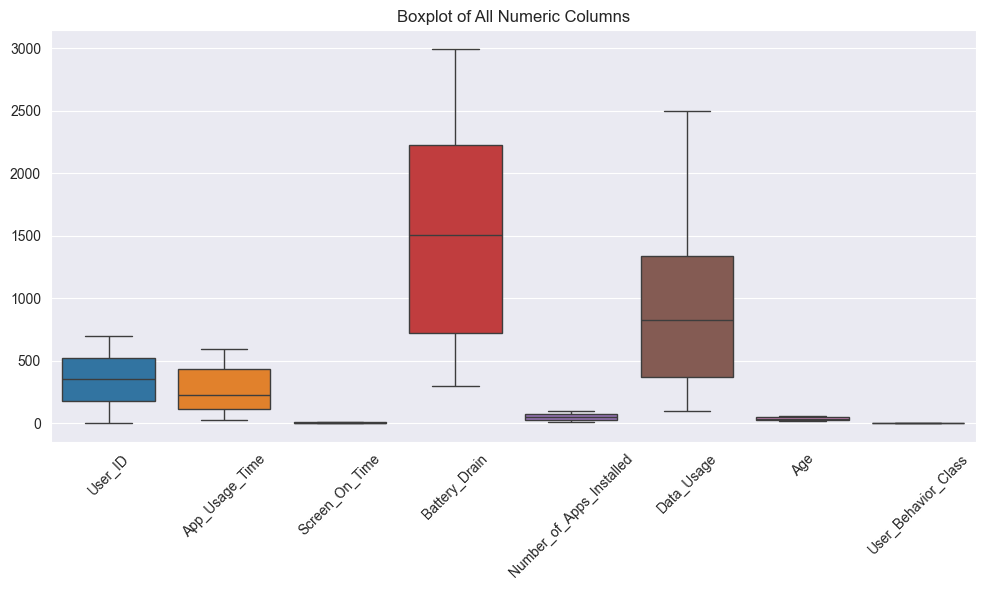

In [8]:
#Limit to only relevant numeric columns
numeric_cols = data_set.select_dtypes(include='number')

# Plot boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=numeric_cols)
plt.title('Boxplot of All Numeric Columns')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

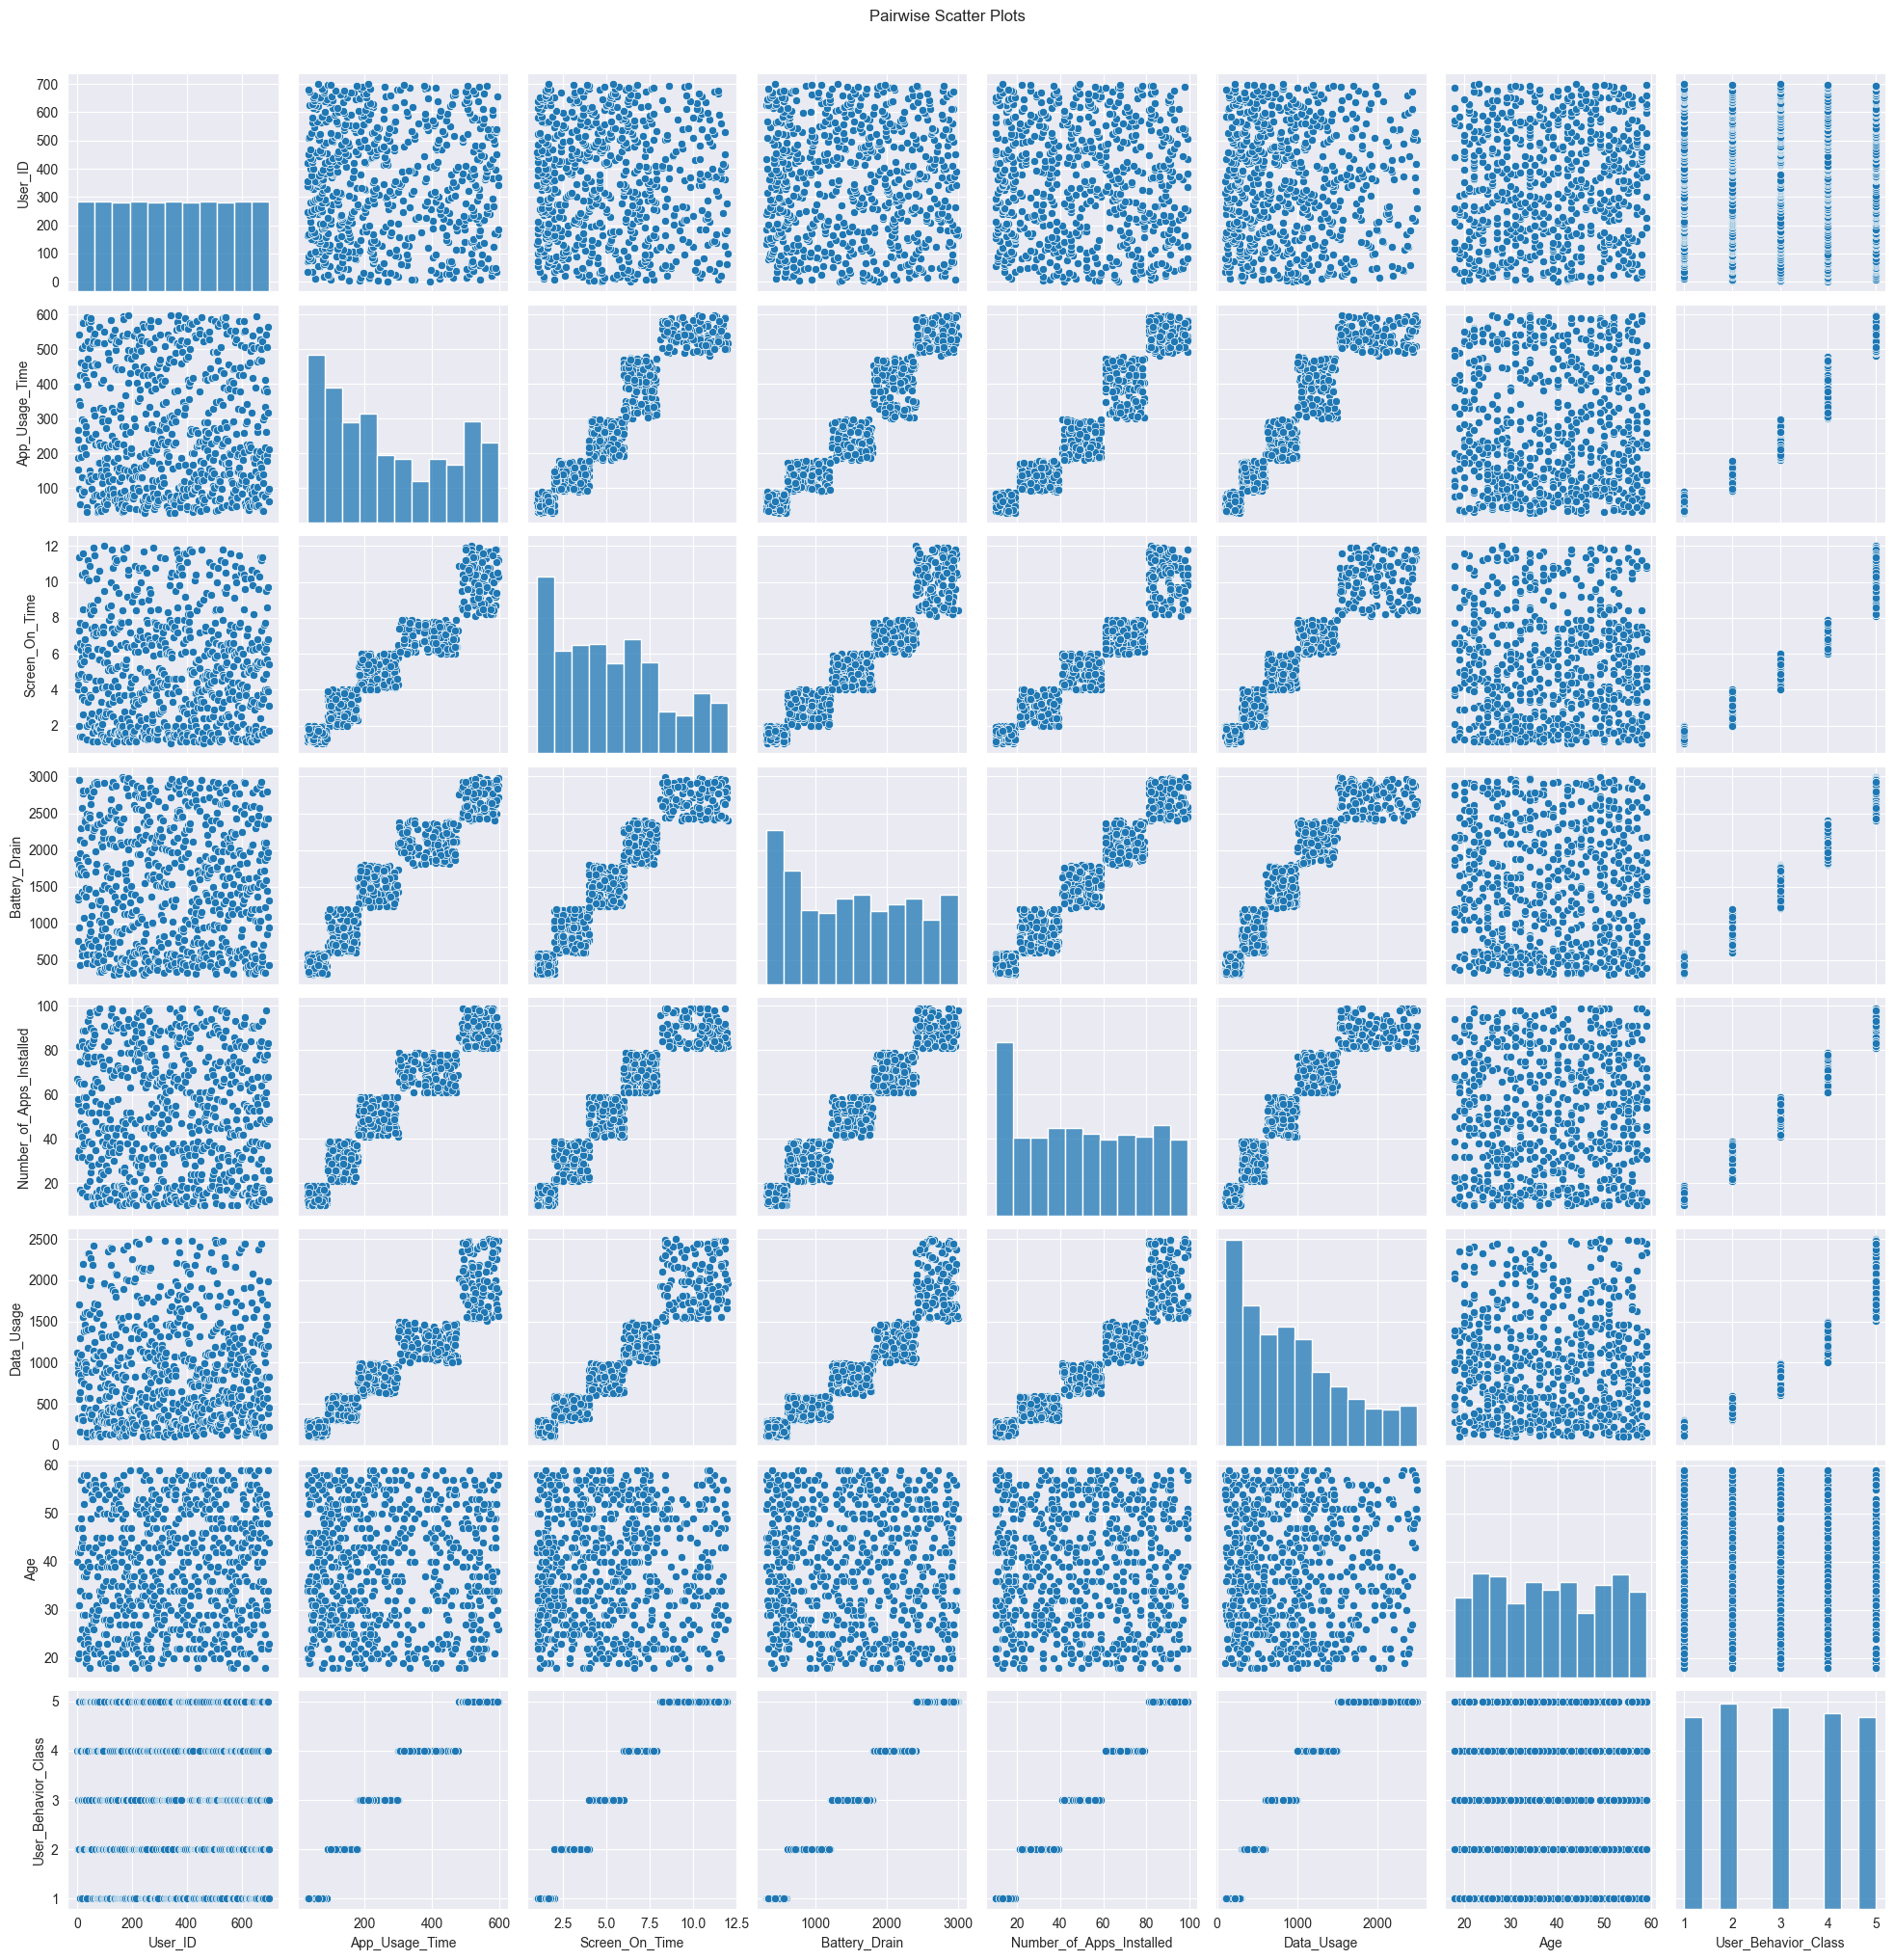

In [9]:
numeric_cols = data_set.select_dtypes(include='number')

# Create pairwise scatter plots
sns.pairplot(numeric_cols)
plt.suptitle("Pairwise Scatter Plots", y=1.02)
plt.show()

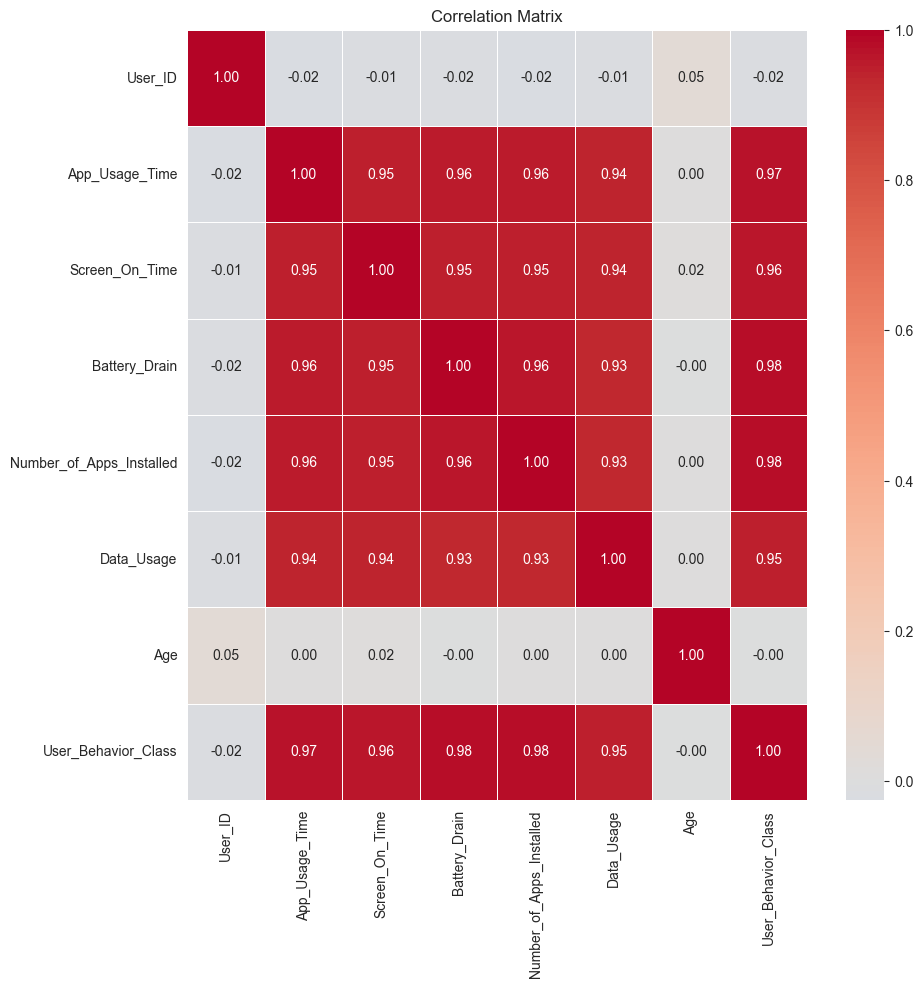

In [10]:
corr = data_set.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, linewidths=.5, fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [11]:
#to identify outliers we repeat the following steps for every column
#Total_app_usage_hours

columns_to_check = ['App_Usage_Time', 'Screen_On_Time', 'Battery_Drain', 'Data_Usage']

def flag_outliers_iqr(column_data):
    Q1 = column_data.quantile(0.25)
    Q3 = column_data.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return (column_data < lower) | (column_data > upper)

for col in columns_to_check:
    data_set[f'{col}_outlier'] = flag_outliers_iqr(data_set[col])

data_set 
#No Outliers found

,User_ID,Device_Model,Operating_System,App_Usage_Time,Screen_On_Time,Battery_Drain,Number_of_Apps_Installed,Data_Usage,Age,Gender,User_Behavior_Class,App_Usage_Time_outlier,Screen_On_Time_outlier,Battery_Drain_outlier,Data_Usage_outlier
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4,False,False,False,False
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3,False,False,False,False
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2,False,False,False,False
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3,False,False,False,False
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,696,iPhone 12,iOS,92,3.9,1082,26,381,22,Male,2,False,False,False,False
696,697,Xiaomi Mi 11,Android,316,6.8,1965,68,1201,59,Male,4,False,False,False,False
697,698,Google Pixel 5,Android,99,3.1,942,22,457,50,Female,2,False,False,False,False
698,699,Samsung Galaxy S21,Android,62,1.7,431,13,224,44,Male,1,False,False,False,False


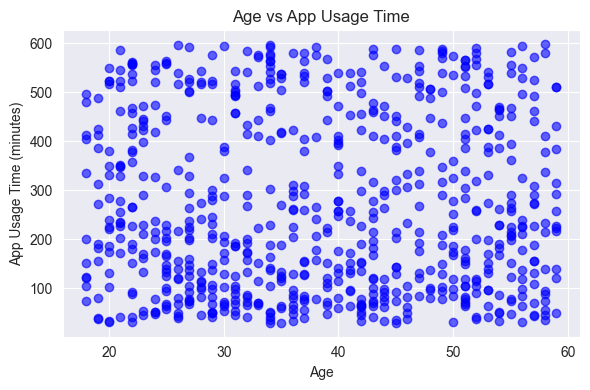

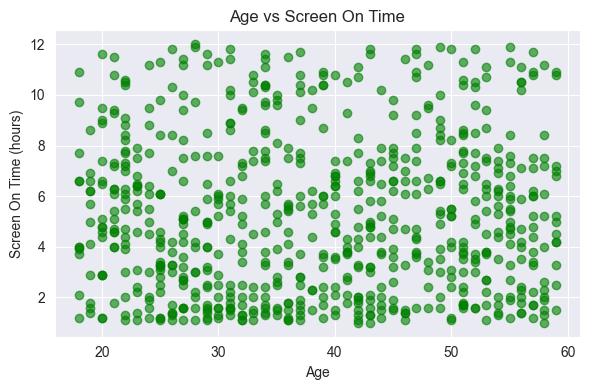

In [12]:
# Age vs App Usage Time
plt.figure(figsize=(6, 4))
plt.scatter(data_set['Age'], data_set['App_Usage_Time'], alpha=0.6, color='blue')
plt.xlabel('Age')
plt.ylabel('App Usage Time (minutes)')
plt.title('Age vs App Usage Time')
plt.grid(True)
plt.tight_layout()
plt.show()

# Age vs Screen On Time
plt.figure(figsize=(6, 4))
plt.scatter(data_set['Age'], data_set['Screen_On_Time'], alpha=0.6, color='green')
plt.xlabel('Age')
plt.ylabel('Screen On Time (hours)')
plt.title('Age vs Screen On Time')
plt.grid(True)
plt.tight_layout()
plt.show()


In [13]:
data_set.to_csv("user_behavior_dataset_cleaned.csv", index=False)